In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fg_path = "/content/fear_greed_index.csv"

In [4]:
fg = pd.read_csv(fg_path)

In [5]:
trader_path = "/content/historical_data.csv"

In [6]:
trades = pd.read_csv(trader_path)

# Cleaning and preprocessing the data

In [7]:
fg.isna().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [8]:
fg.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [9]:
fg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [10]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [12]:
trades.isna().sum()

,0
account,0
coin,0
execution_price,0
size_tokens,0
size_usd,0
side,0
timestamp_ist,0
start_position,0
direction,0
closed_pnl,0


In [13]:
trades.columns = trades.columns.str.lower().str.replace(" ", "_")

In [14]:
fg.columns = fg.columns.str.lower().str.replace(" ", "_")


In [16]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   account           211224 non-null  object 
 1   coin              211224 non-null  object 
 2   execution_price   211224 non-null  float64
 3   size_tokens       211224 non-null  float64
 4   size_usd          211224 non-null  float64
 5   side              211224 non-null  object 
 6   timestamp_ist     211224 non-null  object 
 7   start_position    211224 non-null  float64
 8   direction         211224 non-null  object 
 9   closed_pnl        211224 non-null  float64
 10  transaction_hash  211224 non-null  object 
 11  order_id          211224 non-null  int64  
 12  crossed           211224 non-null  bool   
 13  fee               211224 non-null  float64
 14  trade_id          211224 non-null  float64
 15  timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [17]:
trades['timestamp_ist'] = pd.to_datetime(trades['timestamp_ist'], dayfirst=True)


In [18]:
trades['date'] = trades['timestamp_ist'].dt.date
trades['date'] = pd.to_datetime(trades['date'])


In [20]:
trades.head(3)

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02


In [21]:
trades.drop(columns=['timestamp_ist','timestamp'], inplace=True)

In [22]:
trades.head()

,account,coin,execution_price,size_tokens,size_usd,side,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-12-02


In [23]:
fg['date'] = pd.to_datetime(fg['date'])

In [24]:
fg.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [25]:
fg.drop(columns=["timestamp"], inplace=True)

In [27]:
fg.head()

,value,classification,date
0,30,Fear,2018-02-01
1,15,Extreme Fear,2018-02-02
2,40,Fear,2018-02-03
3,24,Extreme Fear,2018-02-04
4,11,Extreme Fear,2018-02-05


# Merging both datasets

In [28]:
df = trades.merge(fg[['date', 'classification']], on='date', how='left')


In [29]:
df.head()

,account,coin,execution_price,size_tokens,size_usd,side,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-12-02,Extreme Greed


# Feature engineering

In [30]:
df['pnl_flag'] = df['closed_pnl'].apply(lambda x: "profit" if x > 0 else "loss")


In [31]:
df.head()

,account,coin,execution_price,size_tokens,size_usd,side,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,date,classification,pnl_flag
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-12-02,Extreme Greed,loss
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-12-02,Extreme Greed,loss
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-12-02,Extreme Greed,loss
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-12-02,Extreme Greed,loss
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-12-02,Extreme Greed,loss


In [32]:
pnl_stats = df.groupby(['classification', 'pnl_flag']).size().unstack(fill_value=0)


In [34]:
pnl_stats

pnl_flag,loss,profit
classification,,
Extreme Fear,13469,7931
Extreme Greed,21398,18594
Fear,35818,26019
Greed,30945,19358
Neutral,22725,14961


In [33]:
vol_stats = df.groupby('classification')['size_usd'].sum()


In [35]:
vol_stats

,size_usd
classification,
Extreme Fear,1.144843e+08
Extreme Greed,1.244652e+08
Fear,4.833248e+08
Greed,2.885825e+08
Neutral,1.802421e+08


In [36]:
pnl_avg = df.groupby('classification')['closed_pnl'].mean()


In [37]:
pnl_avg

,closed_pnl
classification,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


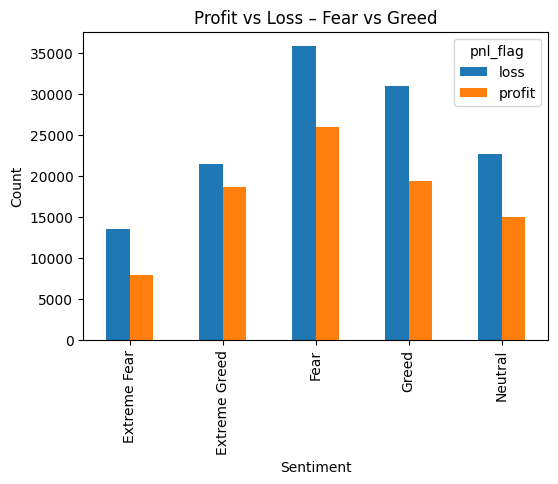

<Figure size 640x480 with 0 Axes>

In [64]:
pnl_stats.plot(kind='bar', figsize=(6,4))
plt.title("Profit vs Loss – Fear vs Greed")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
plt.savefig("pnl_stats.png")


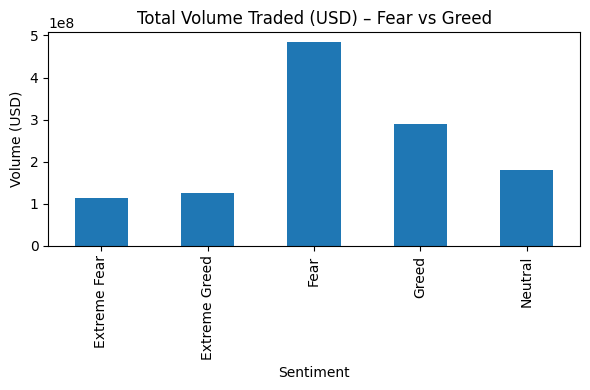

<Figure size 640x480 with 0 Axes>

In [63]:
vol_stats.plot(kind='bar', figsize=(6,4))
plt.title("Total Volume Traded (USD) – Fear vs Greed")
plt.xlabel("Sentiment")
plt.ylabel("Volume (USD)")
plt.tight_layout()
plt.show()
plt.savefig("vol_stats.png")

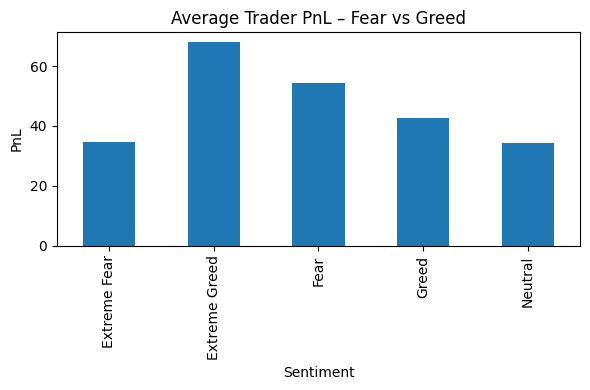

<Figure size 640x480 with 0 Axes>

In [62]:
pnl_avg.plot(kind='bar', figsize=(6,4))
plt.title("Average Trader PnL – Fear vs Greed")
plt.xlabel("Sentiment")
plt.ylabel("PnL")
plt.tight_layout()
plt.show()
plt.savefig("pnl_avg.png")


In [50]:
df.groupby(['classification','side'])['size_usd'].sum()

classification  side
Extreme Fear    BUY     5.644103e+07
                SELL    5.804323e+07
Extreme Greed   BUY     6.033284e+07
                SELL    6.413232e+07
Fear            BUY     2.468417e+08
                SELL    2.364830e+08
Greed           BUY     1.549883e+08
                SELL    1.335942e+08
Neutral         BUY     7.362647e+07
                SELL    1.066156e+08
Name: size_usd, dtype: float64

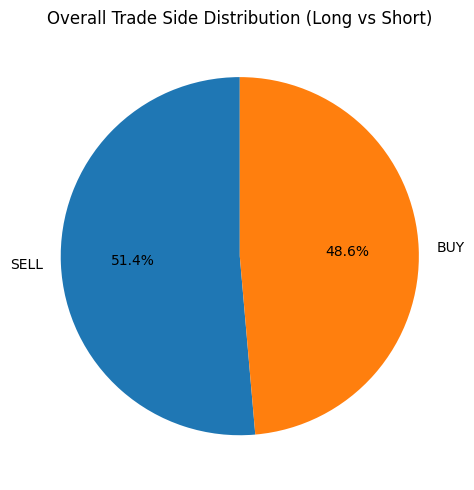

<Figure size 640x480 with 0 Axes>

In [61]:
# Side distribution overall
plt.figure(figsize=(5,5))
side_counts = df['side'].value_counts()
plt.pie(side_counts, labels=side_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Overall Trade Side Distribution (Long vs Short)")
plt.tight_layout()

plt.show()
plt.savefig("side_distribution.png")


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   account           211224 non-null  object        
 1   coin              211224 non-null  object        
 2   execution_price   211224 non-null  float64       
 3   size_tokens       211224 non-null  float64       
 4   size_usd          211224 non-null  float64       
 5   side              211224 non-null  object        
 6   start_position    211224 non-null  float64       
 7   direction         211224 non-null  object        
 8   closed_pnl        211224 non-null  float64       
 9   transaction_hash  211224 non-null  object        
 10  order_id          211224 non-null  int64         
 11  crossed           211224 non-null  bool          
 12  fee               211224 non-null  float64       
 13  trade_id          211224 non-null  float64       
 14  date

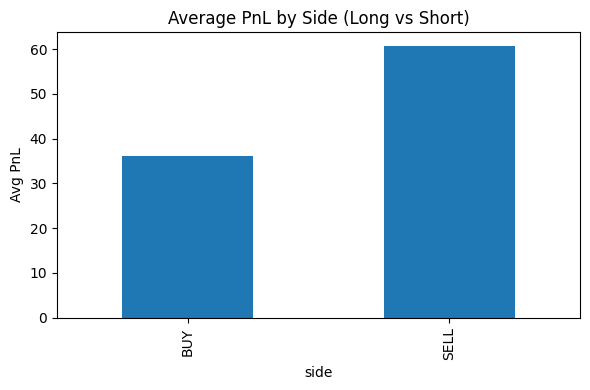

<Figure size 640x480 with 0 Axes>

In [60]:
pnl_by_side = df.groupby('side')['closed_pnl'].mean()

plt.figure(figsize=(6,4))
pnl_by_side.plot(kind='bar')
plt.title("Average PnL by Side (Long vs Short)")
plt.ylabel("Avg PnL")
plt.tight_layout()
plt.show()
plt.savefig("pnl_by_side.png")


In [52]:
df.to_csv("historical+greed")